# Data Validation & Visualization

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
# Import Census income data
raw = pd.read_csv("combined_data.csv")
raw = raw.drop(columns = ['Unnamed: 0'])
pd.set_option('max_columns', None)
raw.head()

,Year,Qtr1,Qtr2,Qtr3,Qtr4,race,sex,age_range
0,2010,428,421.0,416.0,445.0,white,women,16-24
1,2011,435,419.0,426.0,426.0,white,women,16-24
2,2012,420,421.0,418.0,433.0,white,women,16-24
3,2013,435,426.0,417.0,459.0,white,women,16-24
4,2014,449,455.0,454.0,465.0,white,women,16-24


In [59]:
# Rename columns for consistency
raw.rename(columns={'Year': 'year', 'Qtr1':'q1', "Qtr2": 'q2', 'Qtr3': 'q3', 'Qtr4': 'q4', 'age_range': 'age'}, inplace=True)
raw.head()

,year,q1,q2,q3,q4,race,sex,age
0,2010,428,421.0,416.0,445.0,white,women,16-24
1,2011,435,419.0,426.0,426.0,white,women,16-24
2,2012,420,421.0,418.0,433.0,white,women,16-24
3,2013,435,426.0,417.0,459.0,white,women,16-24
4,2014,449,455.0,454.0,465.0,white,women,16-24


In [60]:
# Visualize the data
by_sex = raw.groupby(["sex", "year"]).mean()
by_sex

q1          q2          q3          q4
sex   year                                                
men   2010  672.583333  648.916667  666.750000  682.750000
      2011  677.250000  688.916667  694.583333  693.166667
      2012  710.500000  718.583333  707.166667  717.916667
      2013  717.000000  724.666667  703.916667  720.083333
      2014  720.416667  722.750000  751.416667  754.583333
      2015  737.000000  750.166667  761.916667  797.416667
      2016  794.833333  769.750000  791.666667  777.333333
      2017  796.833333  804.083333  814.416667  825.083333
      2018  829.416667  808.166667  836.500000  882.666667
      2019  879.500000  868.500000  887.083333  886.250000
      2020  897.000000         NaN         NaN         NaN
women 2010  575.500000  601.916667  581.083333  579.000000
      2011  580.500000  588.750000  577.833333  581.833333
      2012  598.083333  591.333333  588.333333  572.416667
      2013  595.416667  624.833333  608.166667  609.166667
      2014  620.083333  624.083333  610.250000  630.916667
      2015  636.583333  635.083333  627.000000  654.250000
      2016  669.166667  659.333333  657.250000  680.500000
      2017  682.083333  692.750000  667.916667  676.583333
      2018  704.916667  690.916667  680.416667  705.083333
      2019  730.083333  721.250000  743.666667  759.750000
      2020  769.500000         NaN         NaN         NaN

In [61]:
raw.describe()

,year,q1,q2,q3,q4
count,264.000000,264.000000,240.000000,240.000000,240.000000
mean,2015.000000,708.829545,696.737500,697.866667,709.337500
std,3.168284,226.673425,218.957825,223.952361,221.961225
min,2010.000000,375.000000,369.000000,378.000000,368.000000
25%,2012.000000,520.750000,513.000000,522.750000,541.750000
50%,2015.000000,686.000000,679.000000,665.500000,690.000000
75%,2018.000000,838.000000,825.500000,819.250000,830.750000
max,2020.000000,1429.000000,1403.000000,1479.000000,1419.000000


In [62]:
raw.dtypes

year      int64
q1        int64
q2      float64
q3      float64
q4      float64
race     object
sex      object
age      object
dtype: object

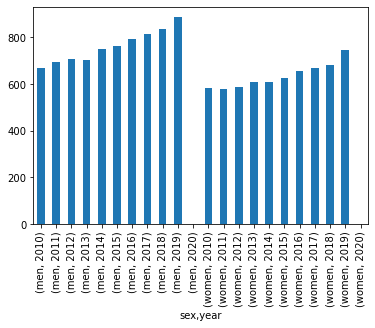

In [63]:
by_sex['q3'].plot(kind='bar')

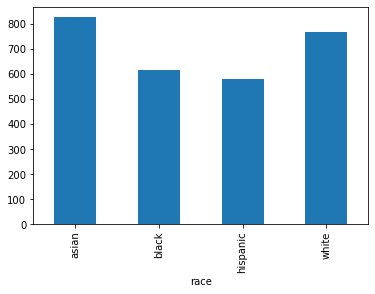

In [64]:
by_race = raw.groupby(['race']).mean()
by_race['q3'].plot(kind='bar')

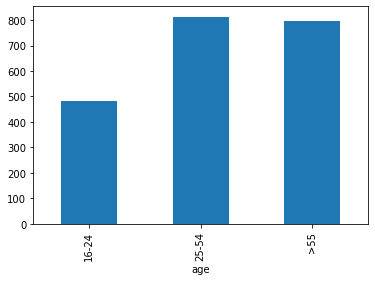

In [65]:
by_age = raw.groupby(['age']).mean()
by_age['q3'].plot(kind='bar')

In [66]:
df_no2020 = raw.dropna()
df_no2020[8:12]

,year,q1,q2,q3,q4,race,sex,age
8,2018,562,513.0,522.0,553.0,white,women,16-24
9,2019,556,536.0,541.0,578.0,white,women,16-24
11,2010,633,617.0,587.0,622.0,black,women,>55
12,2011,662,615.0,587.0,620.0,black,women,>55


# Machine Learning Models

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
# Dummy Encoding
data = df_no2020[['age', 'race', 'sex']]
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.columns

Index(['age_25-54', 'age_>55', 'race_black', 'race_hispanic', 'race_white',
       'sex_women'],
      dtype='object')

In [75]:
# Assign x(data) and y(target)
X = data_encoded
y = df_no2020['q3'].values.reshape(-1,1)
print(X.shape, y.shape)

(240, 6) (240, 1)


In [76]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [77]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [78]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

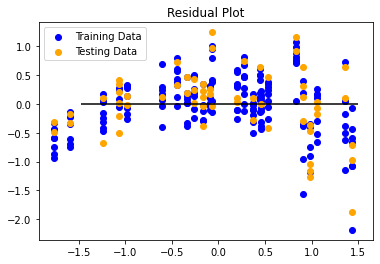

In [80]:
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=1.5)
plt.title("Residual Plot")
plt.show()

In [82]:
print(model.coef_)

[[ 0.71285707  0.67164313 -0.42052127 -0.51558039 -0.16315218 -0.26549538]]


In [83]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.32969462124177923, R2: 0.7429007463414143


In [96]:
# LASSO model - tried alpha values of 0.01, 0.1, and 0.4
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.03).fit(X_train_scaled, y_train_scaled)

predictions_lasso = lasso.predict(X_test_scaled)

MSE_lasso = mean_squared_error(y_test_scaled, predictions_lasso)
r2_lasso = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE_lasso}, R2: {r2_lasso}")

MSE: 0.34208167121098493, R2: 0.7332411974833851


In [97]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.03).fit(X_train_scaled, y_train_scaled)

predictions_ridge = ridge.predict(X_test_scaled)

MSE_ridge = mean_squared_error(y_test_scaled, predictions_ridge)
r2_ridge = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE_ridge}, R2: {r2_ridge}")

MSE: 0.32970800126566263, R2: 0.742890312461294


In [99]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.03).fit(X_train_scaled, y_train_scaled)

predictions_en = elasticnet.predict(X_test_scaled)

MSE_en = mean_squared_error(y_test_scaled, predictions_en)
r2_en = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE_en}, R2: {r2_en}")

MSE: 0.33738103298943667, R2: 0.7369068034733379


### The first model (sklearn) has the best fit